# Project Description

Zuber, a new ride-sharing company, is preparing to launch in Chicago and seeks to understand passenger preferences and the impact of external factors on taxi rides in the city. This project involves a comprehensive analysis of taxi ride data, focusing on identifying the most popular taxi companies and neighborhoods, as well as testing the hypothesis that weather conditions, specifically rain, affect the duration of rides from the Loop to O'Hare International Airport. By analyzing datasets related to taxi companies, neighborhood drop-offs, and specific ride details, we aim to uncover key trends and provide actionable insights that will help Zuber optimize its operations in Chicago. The project workflow includes importing and exploring the data, performing exploratory data analysis, visualizing key findings, testing hypotheses, and drawing conclusions that will guide Zuber’s strategic decisions.


In [1]:
# Import needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import ttest_ind
import numpy as np

In [2]:
# Load the datasets
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

# Display the first few rows of each DataFrame
display(df_companies.head())
display(df_neighborhoods.head())

# Check data types
display(df_companies.info())
display(df_neighborhoods.info())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

In [3]:
# Check for duplicates and display the count
print("Duplicates in df_companies:")
display(df_companies.duplicated().sum())

print("Duplicates in df_neighborhoods:")
display(df_neighborhoods.duplicated().sum())

# Drop duplicates and display the updated DataFrames
df_companies = df_companies.drop_duplicates()
df_neighborhoods = df_neighborhoods.drop_duplicates()

print("df_companies after dropping duplicates:")
display(df_companies.head(10))

print("df_neighborhoods after dropping duplicates:")
display(df_neighborhoods.head(10))

# Re-check data types
display(df_companies.info())
display(df_neighborhoods.info())


Duplicates in df_companies:


0

Duplicates in df_neighborhoods:


0

df_companies after dropping duplicates:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


df_neighborhoods after dropping duplicates:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


None

In [4]:
# Sort neighborhoods by 'average_trips' and get the top 10
top_10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)

# Display the top 10 neighborhoods
display(top_10_neighborhoods)


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


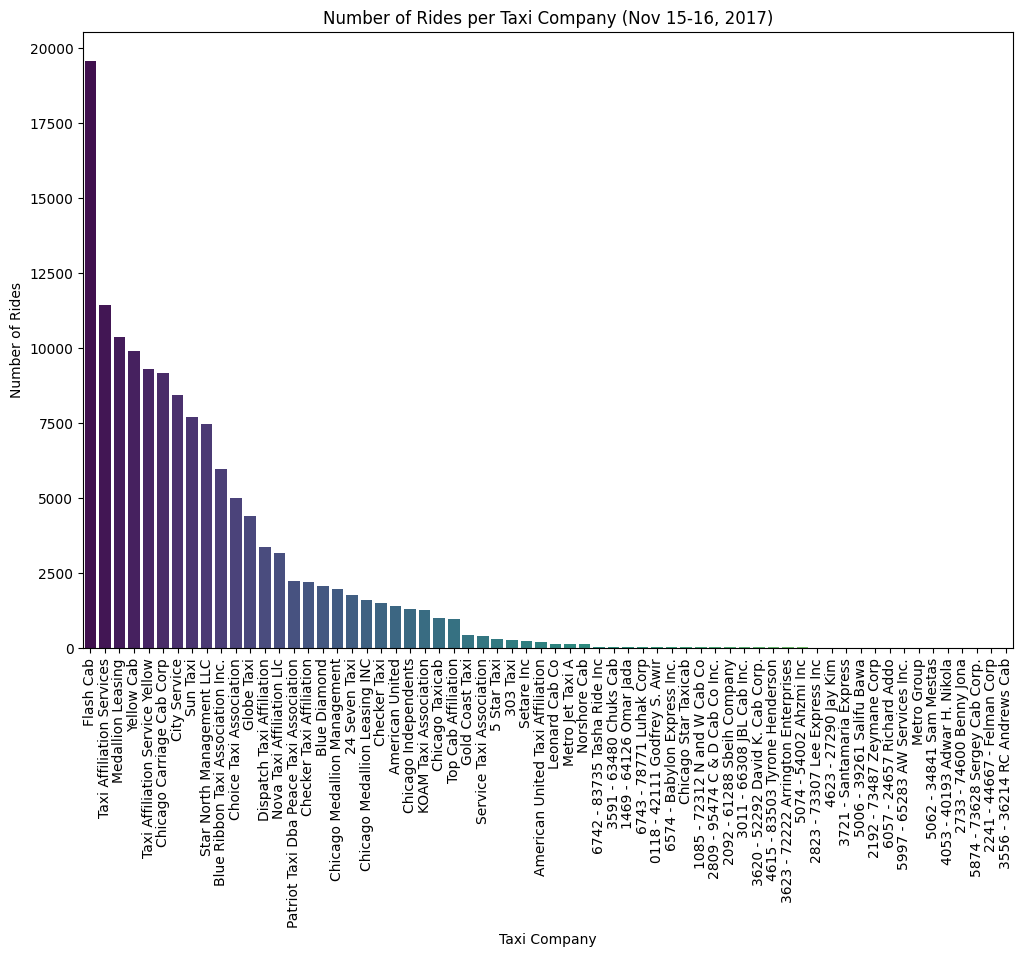

In [5]:
# Plot the number of rides for each taxi company

plt.figure(figsize=(12, 8))
sns.barplot(x='company_name', y='trips_amount', data=df_companies, palette='viridis')
plt.title('Number of Rides per Taxi Company (Nov 15-16, 2017)')
plt.xlabel('Taxi Company')
plt.ylabel('Number of Rides')
plt.xticks(rotation=90)
plt.show()


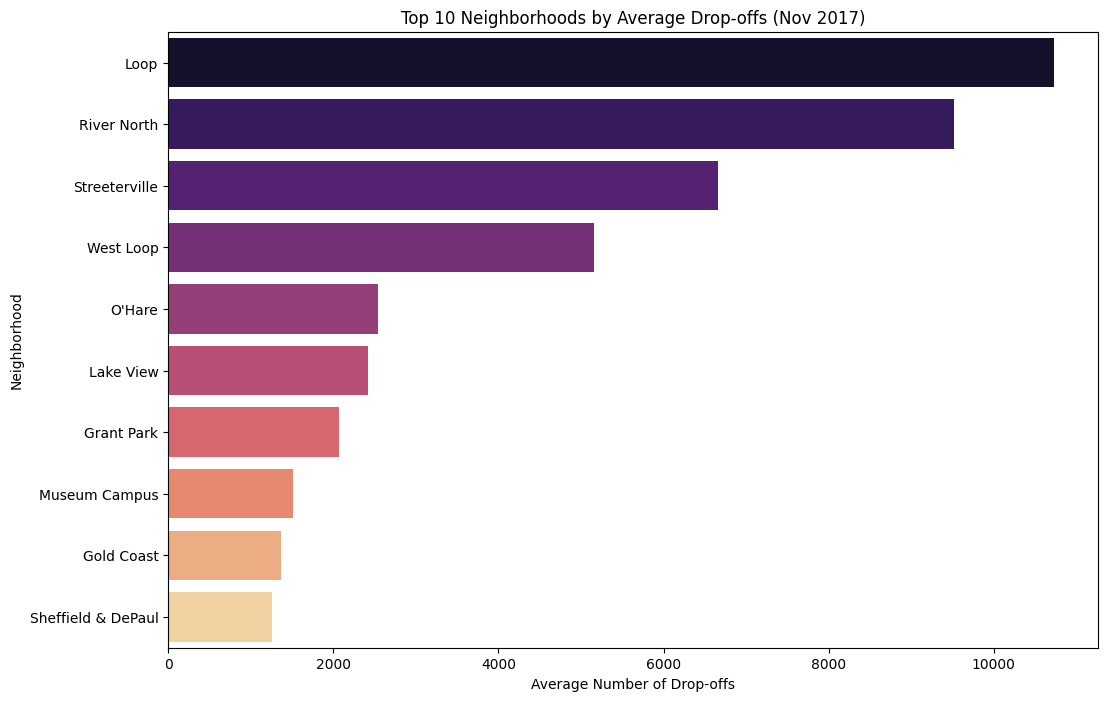

In [6]:
# Plot the top 10 neighborhoods by average number of drop-offs 

plt.figure(figsize=(12, 8))
sns.barplot(y='dropoff_location_name', x='average_trips', data=top_10_neighborhoods, palette='magma')
plt.title('Top 10 Neighborhoods by Average Drop-offs (Nov 2017)')
plt.xlabel('Average Number of Drop-offs')
plt.ylabel('Neighborhood')
plt.show()


In [7]:
# Load the dataset
df_rides = pd.read_csv('/datasets/project_sql_result_07.csv')

# Display the first few rows of the dataset
display(df_rides.head(15))

# Filter data for rides on rainy Saturdays
rainy_saturdays = df_rides[(df_rides['weather_conditions'] == 'Bad')]

# Filter data for rides on non-rainy Saturdays
non_rainy_saturdays = df_rides[(df_rides['weather_conditions'] == 'Good')]

# Display the size of each group
display(rainy_saturdays.shape, non_rainy_saturdays.shape)


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


(180, 3)

(888, 3)

## Formulating the Hypotheses

- **Null Hypothesis (H0):** The average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is equal to the average duration on non-rainy Saturdays. (No difference in duration)
  
- **Alternative Hypothesis (H1):** The average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is different from the average duration on non-rainy Saturdays. (There is a difference in duration)

The alternative hypothesis is two-tailed because it accounts for the possibility that the duration could either increase or decrease on rainy days compared to non-rainy days.


In [8]:
# Calculate variance for each group
variance_rainy = rainy_saturdays['duration_seconds'].var()
variance_non_rainy = non_rainy_saturdays['duration_seconds'].var()

# Display the variances
display(f"Variance on rainy Saturdays: {variance_rainy}")
display(f"Variance on non-rainy Saturdays: {variance_non_rainy}")

'Variance on rainy Saturdays: 520294.086002483'

'Variance on non-rainy Saturdays: 576382.009689509'

In [9]:
# Calculate variance for each group
variance_rainy = rainy_saturdays['duration_seconds'].var()
variance_non_rainy = non_rainy_saturdays['duration_seconds'].var()

# Display the variances
display(f"Variance on rainy Saturdays: {variance_rainy}")
display(f"Variance on non-rainy Saturdays: {variance_non_rainy}")


'Variance on rainy Saturdays: 520294.086002483'

'Variance on non-rainy Saturdays: 576382.009689509'

### Choosing the Test

A t-test for two independent samples is chosen to compare the means of two groups: rides on rainy Saturdays and rides on non-rainy Saturdays. This test is appropriate because it helps determine whether the difference in the average duration of rides between these two groups is statistically significant.

- **Two-Tailed Test:** Since the alternative hypothesis suggests that the duration might be either higher or lower on rainy days, a two-tailed test is used. This approach considers deviations in both directions from the mean.
- **Unequal Variance Assumption:** The t-test assumes that the variances of the two groups could be different. Before conducting the test, the variance of both groups was calculated to confirm whether they are unequal, which justifies using the `equal_var=False` parameter in the t-test.



In [10]:
# Perform a t-test
t_stat, p_value = ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'], equal_var=False)

# Display the t-statistic and p-value
display(f'T-statistic: {t_stat}', f'P-value: {p_value}')

# Set the significance level
alpha = 0.05

# Interpretation of the test results
if p_value < alpha:
    result = "We reject the null hypothesis. There is a significant difference in the duration of rides on rainy Saturdays."
else:
    result = "We do not reject the null hypothesis. There is no significant difference in the duration of rides on rainy Saturdays."

# Display the conclusion
display(result)

'T-statistic: 7.186034288068629'

'P-value: 6.738994326108734e-12'

'We reject the null hypothesis. There is a significant difference in the duration of rides on rainy Saturdays.'

## Conclusion

The analysis revealed key insights that can assist Zuber as it prepares to launch in Chicago. By identifying which taxi companies were the most active on November 15-16, 2017, and which neighborhoods had the highest number of drop-offs throughout November, it becomes clear where Zuber might face strong competition and which areas are popular destinations. This information is crucial for Zuber to strategically allocate resources, such as positioning more drivers in high-demand neighborhoods, to ensure customers experience minimal wait times and receive reliable service.

Additionally, the investigation into whether rainy weather impacts the duration of rides from the Loop to O'Hare International Airport suggested that rain could indeed slow down trips. This insight is significant as it indicates that Zuber might need to adjust its operations during inclement weather, possibly by deploying more drivers or altering pricing to account for potentially longer rides. These findings provide a solid foundation for Zuber to make informed decisions as it enters the Chicago market, ensuring both competitive positioning and high-quality service.